In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [77]:
#โหลด csv เข้าไปใน Python Pandas
df = pd.read_csv('train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [78]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'],['LF','REG','REG','LF'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,REG,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,REG,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [79]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [80]:
#เช็คว่ามีข้อมูลที่หายไปไหม ถ้าเป็นตัวเลขให้ใส่ด้วยค่าเฉลี่ย ถ้าเป็น Categorical ให้ใส่ด้วย Category อันที่มีความถี่สูงที่สุด
avg = df['Item_Weight'].mean()
avg

12.857645184136183

In [81]:
df['Item_Weight'].fillna(value=avg, inplace=True)
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [82]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,LF,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,REG,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,LF,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,REG,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,LF,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,LF,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,REG,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,LF,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,REG,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [83]:
#32 ทำ dummies สำหรับ Categorical data และ สร้าง train/test split ด้วย 80:20 ratio
df_new = pd.get_dummies(df, drop_first=True)
df_new

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [84]:
# ใช้ Standard Scaler ในการทำ feature scaling ทั้งแกน X และ Y
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [85]:
X = df_new.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_new['Item_Outlet_Sales'])

In [89]:
y = np.array(y).reshape(-1,1) #X ไม่ต้องreshapeเพราะเป็นDataframe (yเป็นseries)

In [90]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70)

In [30]:
y_test.shape

(1705, 1)

In [94]:
#64 สร้างโมเดลแบบ Multiple Linear Regression โดยใช้ทุก features (ที่เหลืออยู่) แบบมี standard scaler
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
#แสดงค่า intercept และ coefficient 
print('intercept=',lm.intercept_)
print('coefficient=', lm.coef_)

intercept= [0.00289565]
coefficient= [[-1.98853573e-04 -1.22201621e-02  5.68784861e-01  9.30146604e-03
  -4.88589272e-03  1.86666142e-03  1.04696118e-03 -5.44454005e-03
  -5.71340430e-03  5.73185011e-03 -9.79879057e-04 -5.09314089e-03
  -7.96612205e-03 -2.02619753e-03 -4.63642572e-03  4.35619155e-03
  -6.25536683e-03 -1.05232854e-02 -2.61594638e-04 -1.00710387e+11
   2.22118673e+11 -4.48417567e+11  3.91918764e+10 -3.04286149e+11
  -1.21503033e+11 -3.03854440e+11 -4.38215382e+11  3.81483285e+11
   8.78373073e+10  5.16922322e+11  6.01112515e+11 -3.38807948e+11
  -1.27892681e+11 -5.67977236e+11]]


In [100]:
pred = sc_y.inverse_transform(lm.predict(X_test))
y_test = sc_y.inverse_transform(y_test)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
#65 ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 score: ', r2_score(y_test, pred))

MAE:  833.2396107819778
MSE:  1257919.974060133
RMSE:  1121.5703161461313
R2 score:  0.5677055094041903


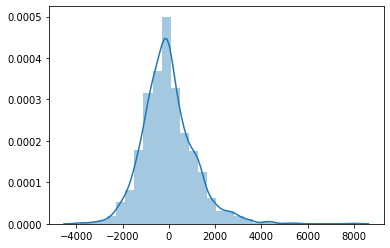

In [104]:
#66 สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย
sns.distplot((y_test - pred), bins=30)

In [106]:
#67 สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย
dict_compare ={'Sale':y_test.flatten(), 'Predicted':pred.flatten()}
df_compare = pd.DataFrame(dict_compare)
df_compare

,Sale,Predicted
0,3243.7776,3668.497967
1,3014.7424,3178.782974
2,2799.6890,1694.353927
3,1328.2710,1218.152443
4,6410.3224,3499.357782
...,...,...
1700,306.2680,491.443305
1701,2656.5420,1555.000746
1702,774.9912,1218.048293
1703,492.6920,1659.854121


In [107]:
print(df_compare.to_string())

            Sale    Predicted
0      3243.7776  3668.497967
1      3014.7424  3178.782974
2      2799.6890  1694.353927
3      1328.2710  1218.152443
4      6410.3224  3499.357782
5      1211.7560  1625.458464
6       908.1512  1537.789899
7      1640.5312  2396.197167
8      2237.0880  2471.810329
9       379.5060  1085.569035
10     1846.9292  1594.447694
11     2375.5744  2405.883151
12     3691.1952  2542.163897
13      595.2252  1318.449240
14     3235.7880  1794.702800
15      516.6608  2025.421885
16     1922.8304  1702.555768
17      759.0120   756.245596
18      656.4788   538.987944
19     1603.9122  2530.004342
20     4362.3216  2768.274329
21     1725.7536  3165.243427
22     1037.3164   841.023989
23      143.8128   364.223640
24     2137.8838  2733.696409
25     2956.1520  2132.071854
26     4579.3724  5141.184060
27     1581.9408  2547.319340
28     1947.4650  3355.213684
29      424.7804  1521.334142
30     6391.6800  3969.284208
31      647.1576  -162.256431
32     285

In [108]:
#68 หา Correlation จาก dataframe ข้อ 47
df_compare.corr()

,Sale,Predicted
Sale,1.000000,0.753614
Predicted,0.753614,1.000000
